<a href="https://colab.research.google.com/github/swarubm/thyroid-MP/blob/main/thyroid%20final%20%2017h%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [3]:
# Load the dataset
df = pd.read_csv('/content/hypothyroid (3).csv')
print(df.shape)             # 3772 rows, 30 columns

(3772, 30)


In [9]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125,1.14,109,negative
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,2,102,NaN,NaN,negative
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,NaN,109,0.91,120,negative
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175,NaN,NaN,negative
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61,0.87,70,negative


In [5]:
print(df.shape)             # 3772 rows, 30 columns
print(df['Class'].value_counts())  # Check class distribution

(3772, 30)
Class
negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: count, dtype: int64


In [6]:
# Replace '?' with NaN and drop columns with all or many missing values
df = df.replace('?', np.nan)
df.drop(columns=['TBG_measured','TBG','referral_source','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured'], inplace=True)

/tmp/ipython-input-2464049046.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


In [7]:
# Map binary features 't'/'f' to 1/0
binary_cols = ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick',
               'pregnant','thyroid_surgery','I131_treatment','query_hypothyroid',
               'query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']

In [8]:
for col in binary_cols:
    df[col] = df[col].map({'t':1,'f':0})
# Convert sex to numeric (M=1, F=0), imputing missing with mode
df['sex'] = df['sex'].map({'M':1,'F':0})
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

/tmp/ipython-input-3922911502.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)


In [10]:
# Convert numeric columns to float
num_cols = ['age','TSH','T3','TT4','T4U','FTI']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
# Drop rows still having missing target or too many missing features (if any)
df.dropna(subset=['Class'], inplace=True)

In [13]:
# Create binary target: 0 = negative (no disease), 1 = any hypothyroid condition
df['disease'] = (df['Class'] != 'negative').astype(int)
df.drop(columns=['Class'], inplace=True)
print("Shape after cleaning:", df.shape)
print(df.isnull().sum())  # Check remaining missing values


Shape after cleaning: (3772, 22)
age                            1
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
disease                        0
dtype: int64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Class imbalance
print(df['disease'].value_counts())

disease
0    3481
1     291
Name: count, dtype: int64


In [19]:
# Feature statistics
#print(df.describe())
print(df.drop(['age', 'sex'], axis=1).describe())


       on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
count   3772.000000         3772.000000                3772.000000   
mean       0.123012            0.013256                   0.011400   
std        0.328494            0.114382                   0.106174   
min        0.000000            0.000000                   0.000000   
25%        0.000000            0.000000                   0.000000   
50%        0.000000            0.000000                   0.000000   
75%        0.000000            0.000000                   0.000000   
max        1.000000            1.000000                   1.000000   

              sick     pregnant  thyroid_surgery  I131_treatment  \
count  3772.000000  3772.000000      3772.000000     3772.000000   
mean      0.038971     0.014051         0.014051        0.015642   
std       0.193552     0.117716         0.117716        0.124101   
min       0.000000     0.000000         0.000000        0.000000   
25%       0.000000     0.0000

In [20]:
# Check correlation of numeric features
corr = df[num_cols + ['TSH','T3','TT4','T4U']].corr()
print("Correlation matrix:\n", corr.round(2))


Correlation matrix:
       age   TSH    T3   TT4   T4U   FTI   TSH    T3   TT4   T4U
age  1.00 -0.06 -0.24 -0.04 -0.17  0.05 -0.06 -0.24 -0.04 -0.17
TSH -0.06  1.00 -0.16 -0.27  0.07 -0.30  1.00 -0.16 -0.27  0.07
T3  -0.24 -0.16  1.00  0.56  0.45  0.35 -0.16  1.00  0.56  0.45
TT4 -0.04 -0.27  0.56  1.00  0.43  0.79 -0.27  0.56  1.00  0.43
T4U -0.17  0.07  0.45  0.43  1.00 -0.17  0.07  0.45  0.43  1.00
FTI  0.05 -0.30  0.35  0.79 -0.17  1.00 -0.30  0.35  0.79 -0.17
TSH -0.06  1.00 -0.16 -0.27  0.07 -0.30  1.00 -0.16 -0.27  0.07
T3  -0.24 -0.16  1.00  0.56  0.45  0.35 -0.16  1.00  0.56  0.45
TT4 -0.04 -0.27  0.56  1.00  0.43  0.79 -0.27  0.56  1.00  0.43
T4U -0.17  0.07  0.45  0.43  1.00 -0.17  0.07  0.45  0.43  1.00


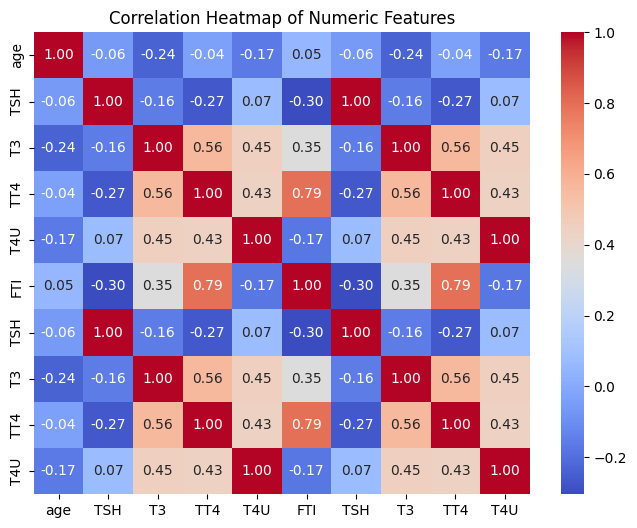

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['age','TSH','T3','TT4','T4U']
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['sex']
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [ ]:
from sklearn.model_selection import train_test_split

X = df[numeric_features + ['sex'] + binary_cols]  # features after cleaning
y = df['disease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train set class distribution:", y_train.value_counts(normalize=True).to_dict())
print("Test set class distribution:", y_test.value_counts(normalize=True).to_dict())


Train set class distribution: {0: 0.9227709645343056, 1: 0.0772290354656944}
Test set class distribution: {0: 0.9231788079470199, 1: 0.07682119205298013}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define pipelines
pipe_lr = Pipeline([('prep', preprocessor), ('clf', LogisticRegression(max_iter=1000))])
pipe_rf = Pipeline([('prep', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])
pipe_xgb = Pipeline([('prep', preprocessor), ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

# Train models
for name, pipe in [("Logistic Regression", pipe_lr),
                   ("Random Forest", pipe_rf),
                   ("XGBoost", pipe_xgb)]:
    pipe.fit(X_train, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
Random Forest trained.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Existing pipelines
pipe_lr = Pipeline([('prep', preprocessor),
                    ('clf', LogisticRegression(max_iter=1000, random_state=42))])

pipe_rf = Pipeline([('prep', preprocessor),
                    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])

pipe_xgb = Pipeline([('prep', preprocessor),
                     ('clf', XGBClassifier(use_label_encoder=False,
                                           eval_metric='logloss',
                                           random_state=42))])

# Additional pipelines
pipe_svm = Pipeline([('prep', preprocessor),
                     ('clf', SVC(probability=True, random_state=42))])

pipe_knn = Pipeline([('prep', preprocessor),
                     ('clf', KNeighborsClassifier(n_neighbors=5))])

pipe_dt = Pipeline([('prep', preprocessor),
                    ('clf', DecisionTreeClassifier(random_state=42))])

pipe_gb = Pipeline([('prep', preprocessor),
                    ('clf', GradientBoostingClassifier(random_state=42))])

pipe_nb = Pipeline([('prep', preprocessor),
                    ('clf', GaussianNB())])

# Collect all pipelines in a dictionary for easy iteration
pipelines = {
    'Logistic Regression': pipe_lr,
    'Random Forest': pipe_rf,
    'XGBoost': pipe_xgb,
    'SVM': pipe_svm,
    'KNN': pipe_knn,
    'Decision Tree': pipe_dt,
    'Gradient Boosting': pipe_gb,
    'Naive Bayes': pipe_nb
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Dictionary with all your pipelines
models = {
    "LogisticRegression": pipe_lr,
    "RandomForest": pipe_rf,
    "XGBoost": pipe_xgb,
    "SVM": pipe_svm,
    "KNN": pipe_knn,
    "DecisionTree": pipe_dt,
    "GradientBoosting": pipe_gb,
    "NaiveBayes": pipe_nb
}

# Train and evaluate
for name, model in models.items():
    # Fit on training data
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation
    print(f"\n{name} evaluation:")
    print(" Accuracy:", accuracy_score(y_test, y_pred))
    print(" Precision:", precision_score(y_test, y_pred))
    print(" Recall:", recall_score(y_test, y_pred))
    print(" F1-score:", f1_score(y_test, y_pred))
    if y_proba is not None:
        print(" ROC-AUC:", roc_auc_score(y_test, y_proba))
    else:
        print(" ROC-AUC: Not available (model does not support probability estimates)")
    print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



LogisticRegression evaluation:
 Accuracy: 0.952317880794702
 Precision: 0.84375
 Recall: 0.46551724137931033
 F1-score: 0.6
 ROC-AUC: 0.9740266165339138
 Confusion Matrix:
 [[692   5]
 [ 31  27]]

RandomForest evaluation:
 Accuracy: 0.9814569536423841
 Precision: 0.8235294117647058
 Recall: 0.9655172413793104
 F1-score: 0.8888888888888888
 ROC-AUC: 0.9935932320783654
 Confusion Matrix:
 [[685  12]
 [  2  56]]


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost evaluation:
 Accuracy: 0.9788079470198675
 Precision: 0.85
 Recall: 0.8793103448275862
 F1-score: 0.864406779661017
 ROC-AUC: 0.9927274526294958
 Confusion Matrix:
 [[688   9]
 [  7  51]]

SVM evaluation:
 Accuracy: 0.9549668874172186
 Precision: 0.875
 Recall: 0.4827586206896552
 F1-score: 0.6222222222222222
 ROC-AUC: 0.9895364369465195
 Confusion Matrix:
 [[693   4]
 [ 30  28]]

KNN evaluation:
 Accuracy: 0.9536423841059603
 Precision: 0.8709677419354839
 Recall: 0.46551724137931033
 F1-score: 0.6067415730337079
 ROC-AUC: 0.8618834413496265
 Confusion Matrix:
 [[693   4]
 [ 31  27]]

DecisionTree evaluation:
 Accuracy: 0.9708609271523179
 Precision: 0.8103448275862069
 Recall: 0.8103448275862069
 F1-score: 0.8103448275862069
 ROC-AUC: 0.8972814525305497
 Confusion Matrix:
 [[686  11]
 [ 11  47]]

GradientBoosting evaluation:
 Accuracy: 0.9827814569536424
 Precision: 0.8461538461538461
 Recall: 0.9482758620689655
 F1-score: 0.8943089430894309
 ROC-AUC: 0.9959679414238362
 Con

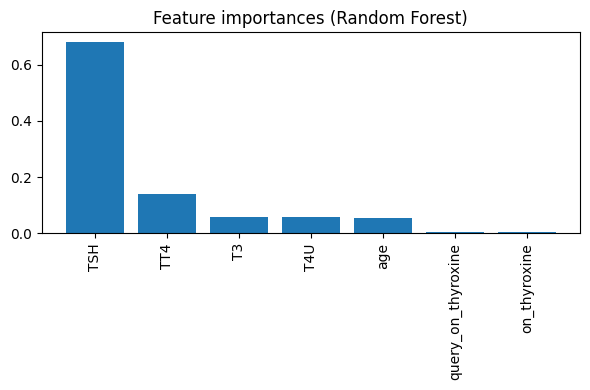

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names after one-hot encoding (sex) and original order
ohe = pipe_rf.named_steps['prep'].named_transformers_['cat'].named_steps['onehot']
feat_names = numeric_features + list(binary_cols) + ['sex_M']  # sex encoded as one column
importances = pipe_rf.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
plt.title("Feature importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(feat_names)[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import joblib
best_model = pipe_xgb  # suppose XGBoost was best
joblib.dump(best_model, 'thyroid_detection_pipeline.joblib')
print("Pipeline saved to 'thyroid_detection_pipeline.joblib'.")


Pipeline saved to 'thyroid_detection_pipeline.joblib'.


In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)
model = joblib.load('thyroid_detection_pipeline.joblib')  # load saved pipeline

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # expects JSON with feature values
    df = pd.DataFrame([data])
    prediction = model.predict(df)[0]
    return jsonify({'prediction': int(prediction)})

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
# all in one
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv(r'C:\Users\swaro\Downloads\hypothyroid (3).csv')
print(df.shape)             # 3772 rows, 30 columns
print(df.shape)             # 3772 rows, 30 columns
print(df['Class'].value_counts())  # Check class distribution# Replace '?' with NaN and drop columns with all or many missing values
df = df.replace('?', np.nan)
df.drop(columns=['TBG_measured','TBG','referral_source','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured'], inplace=True)

# Map binary features 't'/'f' to 1/0
binary_cols = ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick',
               'pregnant','thyroid_surgery','I131_treatment','query_hypothyroid',
               'query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']
for col in binary_cols:
    df[col] = df[col].map({'t':1,'f':0})
# Convert sex to numeric (M=1, F=0), imputing missing with mode
df['sex'] = df['sex'].map({'M':1,'F':0})
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Convert numeric columns to float
num_cols = ['age','TSH','T3','TT4','T4U','FTI']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows still having missing target or too many missing features (if any)
df.dropna(subset=['Class'], inplace=True)

# Create binary target: 0 = negative (no disease), 1 = any hypothyroid condition
df['disease'] = (df['Class'] != 'negative').astype(int)
df.drop(columns=['Class'], inplace=True)
print("Shape after cleaning:", df.shape)
print(df.isnull().sum())  # Check remaining missing values
import seaborn as sns
import matplotlib.pyplot as plt

# Class imbalance
print(df['disease'].value_counts())
# Feature statistics
print(df.describe())
# Check correlation of numeric features
corr = df[num_cols + ['TSH','T3','TT4','T4U']].corr()
print("Correlation matrix:\n", corr.round(2))
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['age','TSH','T3','TT4','T4U']
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['sex']
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
from sklearn.model_selection import train_test_split

X = df[numeric_features + ['sex'] + binary_cols]  # features after cleaning
y = df['disease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train set class distribution:", y_train.value_counts(normalize=True).to_dict())
print("Test set class distribution:", y_test.value_counts(normalize=True).to_dict())
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Existing pipelines
pipe_lr = Pipeline([('prep', preprocessor),
                    ('clf', LogisticRegression(max_iter=1000, random_state=42))])

pipe_rf = Pipeline([('prep', preprocessor),
                    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])

pipe_xgb = Pipeline([('prep', preprocessor),
                     ('clf', XGBClassifier(use_label_encoder=False,
                                           eval_metric='logloss',
                                           random_state=42))])

# Additional pipelines
pipe_svm = Pipeline([('prep', preprocessor),
                     ('clf', SVC(probability=True, random_state=42))])

pipe_knn = Pipeline([('prep', preprocessor),
                     ('clf', KNeighborsClassifier(n_neighbors=5))])

pipe_dt = Pipeline([('prep', preprocessor),
                    ('clf', DecisionTreeClassifier(random_state=42))])

pipe_gb = Pipeline([('prep', preprocessor),
                    ('clf', GradientBoostingClassifier(random_state=42))])

pipe_nb = Pipeline([('prep', preprocessor),
                    ('clf', GaussianNB())])

# Collect all pipelines in a dictionary for easy iteration
pipelines = {
    'Logistic Regression': pipe_lr,
    'Random Forest': pipe_rf,
    'XGBoost': pipe_xgb,
    'SVM': pipe_svm,
    'KNN': pipe_knn,
    'Decision Tree': pipe_dt,
    'Gradient Boosting': pipe_gb,
    'Naive Bayes': pipe_nb
}
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Dictionary with all your pipelines
models = {
    "LogisticRegression": pipe_lr,
    "RandomForest": pipe_rf,
    "XGBoost": pipe_xgb,
    "SVM": pipe_svm,
    "KNN": pipe_knn,
    "DecisionTree": pipe_dt,
    "GradientBoosting": pipe_gb,
    "NaiveBayes": pipe_nb
}

# Train and evaluate
for name, model in models.items():
    # Fit on training data
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation
    print(f"\n{name} evaluation:")
    print(" Accuracy:", accuracy_score(y_test, y_pred))
    print(" Precision:", precision_score(y_test, y_pred))
    print(" Recall:", recall_score(y_test, y_pred))
    print(" F1-score:", f1_score(y_test, y_pred))
    if y_proba is not None:
        print(" ROC-AUC:", roc_auc_score(y_test, y_proba))
    else:
        print(" ROC-AUC: Not available (model does not support probability estimates)")
    print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
import numpy as np
import matplotlib.pyplot as plt

# Get feature names after one-hot encoding (sex) and original order
ohe = pipe_rf.named_steps['prep'].named_transformers_['cat'].named_steps['onehot']
feat_names = numeric_features + list(binary_cols) + ['sex_M']  # sex encoded as one column
importances = pipe_rf.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
plt.title("Feature importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(feat_names)[indices], rotation=90)
plt.tight_layout()
plt.show()
import joblib
best_model = pipe_xgb  # suppose XGBoost was best
joblib.dump(best_model, 'thyroid_detection_pipeline.joblib')
print("Pipeline saved to 'thyroid_detection_pipeline.joblib'.")

